In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

# Introduction to scikit-learn

##### Version 0.1

***
By AA Miller (Northwestern/CIERA)

28 Feb 2022

Broadly speaking, machine-learning methods constitute a diverse collection of data-driven algorithms designed to classify/characterize/analyze sources in multi-dimensional spaces. The topics and studies that fall under the umbrella of machine learning is growing, and there is no good catch-all definition. We cannot cover all possible algorithms.

Today we will focus on the [`scikit-learn`](https://scikit-learn.org/stable/index.html) python library, which provides a nice interface to build a wide variety of machine learning models. As we will see, `scikit-learn` makes machine learning "easy."

## Problem 1) Data with `scikit-learn`

In 4 lines we can build a complex classifier for the famous [iris data set](https://en.wikipedia.org/wiki/Iris_flower_data_set).

    from sklearn import datasets
    from sklearn.ensemble import RandomForestClassifier
    iris = datasets.load_iris()
    RFclf = RandomForestClassifier().fit(iris.data, iris.target)

Those 4 lines of code have constructed a model that is superior to any system of hard cuts that we could have encoded while looking at the multidimensional space. 

It's also fast – execute the next cell.

In [2]:
# execute example code here

from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
iris = datasets.load_iris()
RFclf = RandomForestClassifier().fit(iris.data, iris.target)

Generally speaking, the procedure for `scikit-learn` is uniform across all machine-learning algorithms. Models are accessed via the various modules (`ensemble`, `SVM`, `neighbors`, etc), with user-defined tuning parameters. The features (or data) for the models are stored in a 2D array, `X`, with rows representing individual sources and columns representing the corresponding feature values.$^\dagger$  In cases where there is a known classification or scalar value (typically supervised methods), this information is stored in a 1D array `y`. 

$^\dagger$In a minority of cases, `X`, represents a similarity or distance matrix where each entry represents the distance to every other source in the data set.

Unsupervised models are fit by calling `.fit(X)` and supervised models are fit by calling `.fit(X, y)`. In both cases, predictions for new observations, `Xnew`, can be obtained by calling `.predict(Xnew)`. Those are the basics and beyond that, the details are algorithm specific, so ...

read the docs!

**Problem 1a** What is the pythonic type of `iris`?

In [6]:
print(type(iris))

<class 'sklearn.utils.Bunch'>


You likely haven't encountered a `scikit-learn Bunch` before. It's essentially the same as a dictionary. 

**Problem 1b** What are the keys of iris?

In [7]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Most importantly, iris contains `data` and `target` values. These are all you need for `scikit-learn`, though the feature and target names and description are useful.

**Problem 1c** What is the shape and content of the `iris` data?

In [10]:
print(np.shape(iris['data']))
print(iris['feature_names'])

(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


The data is a 2d array with shape 150 x 4.

We said earlier that each row represents a source and each column a "feature."

**Problem 1d**

What is the first feature in the `iris` data set? What units is it measured in?

In [12]:
print(iris.feature_names[0])

sepal length (cm)


**Problem 1e** 

What is the shape and content of the `iris` target?

In [17]:
print(np.shape(iris.target))
print(iris.target)
print(iris.target_names)

(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


**Problem 1f**

What are the names of class 0, 1, and 2 in the `iris` target?

An important lesson from this week - worry about the data!

If you are worried about the data, then you should look at the data. This is actually an important aspect of applying machine learning models.

**Problem 1g** 

Make a scatter plot showing sepal length vs. sepal width for the iris data set. Color the points according to their respective classes. 

<IPython.core.display.Javascript object>


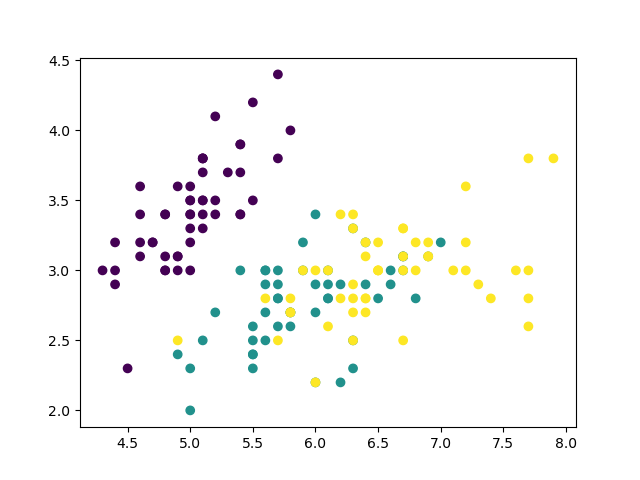

In [20]:

fig, ax = plt.subplots()
ax.scatter(iris.data[:,0], iris.data[:,1], c=iris.target)


We will return to the `iris` data set later in this notebook.

## Problem 2) Linear Regression

At its core, `scitkit-learn` is designed to help you, the user, easily fit models to data. 

To demonstrate this we will start with a familiar example - linear regression. 

**Problem 2a**

Simulate data drawn from a linear relationship with Gaussian scatter. 

In [21]:
np.random.seed(2012)
n_obs = 25
x = np.random.uniform(0,100, n_obs)
y_true = 2.3*x + 14
y_obs = y_true + np.random.normal(0, 15, n_obs)

**Problem 2b**

Plot the simulated data. Overplot the true relation from which the data are drawn. 

<IPython.core.display.Javascript object>


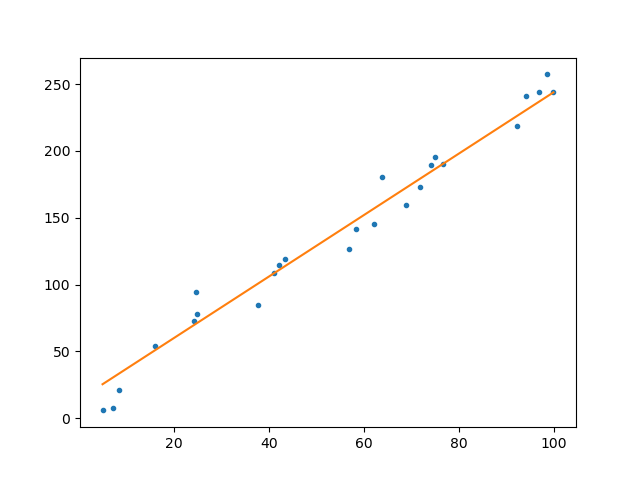

In [24]:
fig, ax = plt.subplots()
ax.plot(x,y_obs, '.')
ax.plot(np.sort(x), y_true[np.argsort(x)])

The [`sklearn.linear_model`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model) has a [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) class.

The "standard" procedure in `scikit-learn` is to generate the model by creating an instance of the relevant class object (e.g., `reg_model = LinearRegression()`). 

The model is then trained using the aforementioned training and label arrays, `X` and `y`, with the `.fit()` method. 

Finally, predictions can be made using the `.predict()` method (note - the precise syntax for this can vary depending on the model being used). 

**Problem 2c** 

Generate an instance of the `LinearRegression` class. Call this instance `reg_model`.

In [25]:
from sklearn.linear_model import LinearRegression

reg_model = LinearRegression()

**Problem 2d** 

Fit the model to the training data `x` and `y_obs`. 

*Hint* - the standard feature array in `scikit-learn` is 2D, so you will need to convert `x` to a 2D array.

In [29]:
X = x.reshape([len(x),1])
print(X.shape)
reg_model.fit(X,y_obs)

(25, 1)


LinearRegression()

**Problem 2e**

Output the best-fit parameters from the model (these are stored in the `.coef_` and `.intercept_` attributes). 

Overplot the best-fit line on top of the observations.

The best fit is y = 2.4260015592346775x + 6.373264215931641


<IPython.core.display.Javascript object>


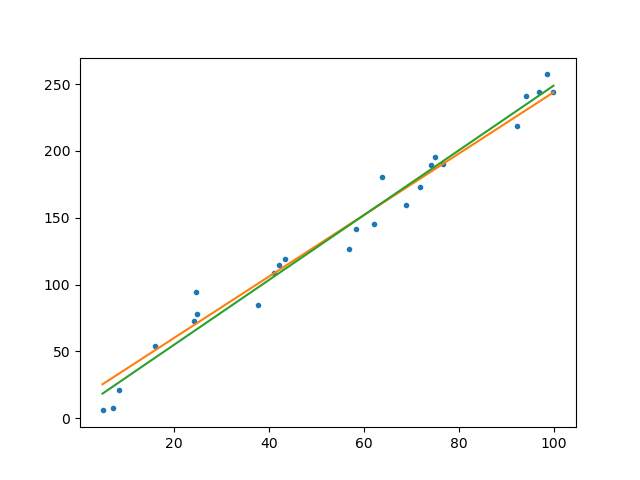

In [43]:
print(f'The best fit is y = {reg_model.coef_[0]}x + {reg_model.intercept_}')

fig, ax = plt.subplots()
ax.plot(x,y_obs, '.')
ax.plot(np.sort(x), y_true[np.argsort(x)])
ax.plot(np.sort(x), reg_model.coef_[0]*np.sort(x) + reg_model.intercept_)

**Problem 2f**

Fit for the model parameters using some other method (e.g., `numpy`, `scipy`, linear algebra), and compare the model parameters to those found with `scikit-learn`.

In [38]:
from scipy.stats import linregress

result = linregress(x, y_obs)

print(f'The best-fit model is: y = {result.slope}x+{result.intercept}')

The best-fit model is: y = 2.4260015592346784x+6.373264215931613


The results are identical!

Under the hood, polynomial regression is just linear algebra, so it doesn't matter which library you use to solve the problem. Both `numpy` and `scikit-learn` can handle multi-dimensional input and even account for uncertainties on the observations via input weights. For this problem, it does not matter which library you use. 

## Problem 3) Linear Classification

We will now examine why linear regression does not work for classification. 

Suppose we have a method to measure the mass of a galaxy (but this method has noise). We would like to separate the galaxies into two classes "normal" and "dwarf", where dwarf galaxies are those with a mass below 60. We could simulate such a dataset as follows.

*Note* - this is very much a "toy" data set to be used purely for illustration. While we use some familiar terms, nothing about this is truly physical, which is why we do not include units, etc.

<IPython.core.display.Javascript object>


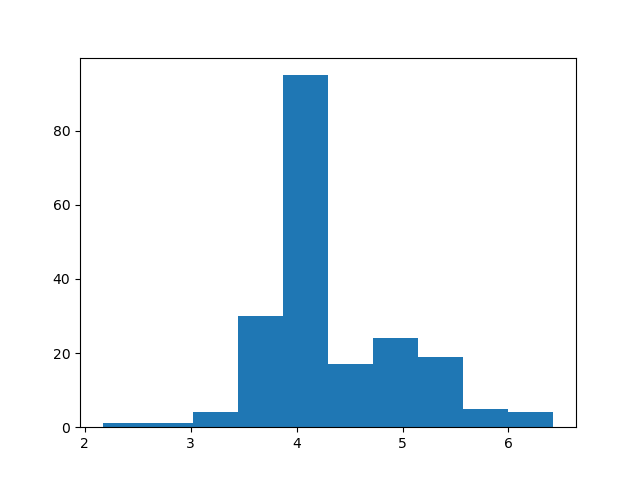

(array([ 1.,  1.,  4., 30., 95., 17., 24., 19.,  5.,  4.]),
 array([2.16673306, 2.59254103, 3.018349  , 3.44415696, 3.86996493,
        4.29577289, 4.72158086, 5.14738882, 5.57319679, 5.99900475,
        6.42481272]),
 <BarContainer object of 10 artists>)

In [46]:
np.random.seed(1938)
n_obs = 200
mass = np.random.normal(65, 20, size=n_obs)
mass[mass > 70] *= (mass[mass > 70]-60)/60*5
y = (mass > 60).astype(bool)
obs_mass = mass + np.random.normal(0, 7, size=n_obs)
X = obs_mass.reshape(-1,1)

fig, ax = plt.subplots()
ax.hist(np.log(mass))

In the previous cell we have simulated 200 galaxies, most of which are normal with masses > 60. We use this information to define our class vector `y`, such that all normal galaxies have a class of 1 and all dwarf galaxies have a class of 0. Finally, we simulate our observations `X`, which adds Gaussian noise to the true mass measurements. 

**Problem 3a**

Build a classifier using `LinearRegression()`. Find the best fit line for the data. All sources with an extrapolated best-fit value > 0.5 are classified as normal, and everything else is considered a dwarf. 

From the training data, how accurate is this model?

In [52]:
reg_model = LinearRegression()
reg_model.fit(X,y)

y_pred = (reg_model.predict(X)>0.5).astype(int)

n_incorrect = np.sum((y_pred - y)**2)

accuracy = (n_obs - n_incorrect)/n_obs

print(f'This model has an accuracy of {accuracy:.3f}')

This model has an accuracy of 0.785


**Problem 3b**

To understand the short-comings of this model, plot the data. Overplot the best-fit linear regression model. 

<IPython.core.display.Javascript object>


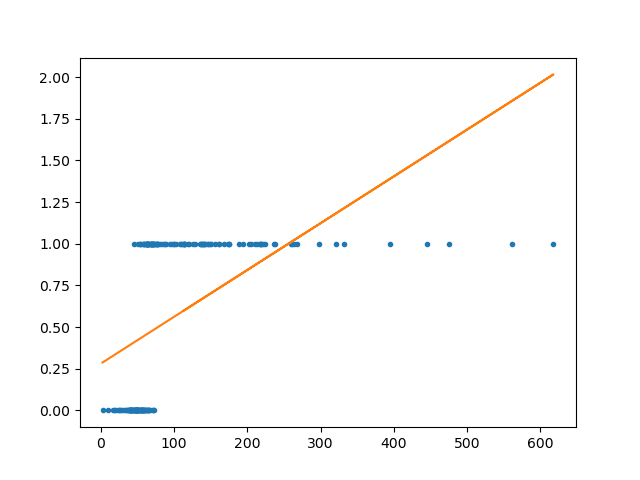

In [58]:
fig, ax = plt.subplots()
ax.plot(obs_mass,y, '.')
ax.plot(obs_mass,reg_model.coef_*obs_mass+reg_model.intercept_)

As we can see in the above plot, every galaxy with $\mathrm{mass} \gtrsim 78$ is classified as normal. 

It is also clear from the plot that linear regression is not a particularly good approach to this problem.

**Problem 3c**

Build a classifier via "hard cut" and assess it's accuracy. 

Find the maximum mass for dwarf galaxies in the data set. Classify all sources with a mass less than this as dwarf galaxies.

In [ ]:
mass_cut = # complete

y_pred = # complete
# complete


# complete

# complete

# complete

This represents a slight improvement over the linear regression model. (Note - if you did the reverse and used the normal galaxies to determine the mass cut, you would get similar results)

At this point you must be thinking - "There has to be a better way!"

Fortunately, there is. 

[Logistic Regression](https://en.wikipedia.org/wiki/Logistic_regression) - the "hello, world" of machine learning classification.

(and also one of the absolutely worst named algorithms ever, as logistic regression is used for *classification* and not *regression*)

Briefly, logistic regression is used to understand the relationship between a dependent variable (normal vs. dwarf) and one or more independent variables (mass, but could also be mass, star formation rate, metallicity, and so on) by estimating probabilities via the logistic function.

The logistic function: 

$$ p(x) = \frac{1}{1 + e^{-(x - \mu)/s}}$$

can be rewritten as: 

$$ p(x) = \frac{1}{1 + e^{-(B_0 + B_1 x)}}$$

which recasts the problem as having a slope and intercept, similar to the linear regression problem that we worked on previously. 

**Problem 3d**

Execute the cell below to see the logistic function. 

How might this be useful for our galaxy classification problem? 

In [ ]:
x = np.linspace(-10,10,1000)
p_x = 1/(1 + np.exp(-x))
fig, ax = plt.subplots()
ax.plot(x, p_x)
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('p(x)', fontsize=14)
fig.tight_layout()

*write your answer here*

**Problem 3e**

Create an instance of the [`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) class from the `sklearn.linear_model` module. 

Fit the model to the simulated galaxy data.

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = # complete
logreg.fit( # complete

**Problem 3f**

Assess the accuracy of the Logistic Regression model. 

In [ ]:
y_pred = # complete

# complete

# complete

# complete

This model shows significant improvement over our alternative methods! 

**Problem 3g**

Overplot the best fit logistic regression model on the data. 

*Hint* – the `.intercept_` and `.coef_` attributes can be used to determine the argument for the logistic function.

In [ ]:
fig, ax = plt.subplots()
ax.plot( # complete

# complete
    
# complete
    
# complete

We can see that the logistic regression model is clearly superior to the linear regression model. The model is not perfect, but no model could be in the presence of noise. 

We also see that the probability cut ($p \approx 0.5 \;\mathrm{at\;mass} \approx 61.5$) is much closer to the true answer of 60. 

The previous example used a simple toy data set that was easy to visualize. But logistic regression can be extended to include multiple features, and more than two classes (in which case the problem is a multinomial one rather than a binomial one). 

This optimization happens entirely under the hood with `scikit-learn`.

**Problem 3f**

Fit a logistic regression model to the iris data set. 

Assess the accuracy of this model. 

*Hint* – [`accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) from `sklearn.metrics` will simplify your calculations.

In [ ]:
from sklearn.metrics import accuracy_score

logreg = LogisticRegression( # complete
# complete
# complete
    
print('The accuracy of this model is {}' # complete

In conclustion, today we have learned the basics for the `scikit-learn` library. 

We have also learned how the logistic regression algorithm can be very useful for classification problems. Logistic regression is often used as a starting point when building machine learning models: when faced with a new data set, logistic regression can be applied with minimal tuning to get a sense of whether machine learning could be helpful in classifying the data. 

I also want to end with two caveats: 

1. Logistic regression is very powerful, but like all machine learning techniques, it also has limitations. For example, logistic regression can lead to "interpretable" results (such as the mean value where the curve transitions from 0 to 1), but these interpretations will not work if the features are correlated. 

2. The error rates (1 - accuracy) measured throughout this notebook are the "training error." This is not a particularly good way to measure the efficacy of a model as we will discuss in further detail later today. 

## Challenge Problem

Pick any classification model from the `scikit-learn` library and measure its accuracy when applied to the iris data set.